<a href="https://colab.research.google.com/github/fayeholt/4650-implicit-hate_study/blob/main/4650_BERT_Multi_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOURCE: 
https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Preprocess

In [ ]:
!pip install contractions
!pip install nltk

In [ ]:
import pandas as pd

myFile = '/content/gdrive/MyDrive/CS 4650 Project/hydrated_hate.csv'
multi_labels = '/content/gdrive/MyDrive/CS 4650 Project/implicit-hate-corpus/implicit_hate_v1_stg2.tsv'

myDf=pd.read_csv(myFile)
df_multi=pd.read_csv(multi_labels, delimiter="\t")

In [ ]:
N = 0
for i in myDf['content']:
  if i != "NOT AVAILABLE":
    N += 1

In [ ]:
print(N) # N = 8587

8587


In [ ]:
import csv

newcsv = open('/content/gdrive/MyDrive/CS 4650 Project/multi-class-hyrated-hate.csv', 'w')
filewriter = csv.writer(newcsv)

multi = df_multi.set_index('ID').T.to_dict('list')
print(multi)
print(len(multi))

filewriter = csv.writer(newcsv, delimiter=",")
filewriter.writerow(('ID', 'content', 'label'))

for index, row in myDf.iterrows():
  if row['content'] != 'NOT AVAILABLE':
    key = row['ID']
    try: filewriter.writerow((row['ID'], row['content'], multi[key][0]))
    except: continue

{'399886440588247041': ['white_grievance', nan], '755109998770921473': ['irony', nan], '251422864232808449': ['white_grievance', nan], '548214253497249792': ['stereotypical', nan], '184109665108504579': ['stereotypical', nan], '929893092299300864': ['white_grievance', nan], '774362837057667073': ['white_grievance', nan], '896809946209234946': ['white_grievance', nan], '847795052093079553': ['incitement', nan], '835184034854547458': ['white_grievance', nan], '932309379172495365': ['white_grievance', nan], '382827832407109632': ['stereotypical', nan], '892751690620780544': ['white_grievance', nan], '840324729093283840': ['stereotypical', nan], '424860910713192449': ['white_grievance', nan], '537630568553644032': ['stereotypical', nan], '254700110808752130': ['incitement', nan], '937051454027771904': ['incitement', nan], '807666445505138688': ['incitement', nan], '589152067127746560': ['incitement', nan], '599638600238682112': ['stereotypical', nan], '625309687152549888': ['white_grievanc

In [ ]:
df_m = pd.read_csv('/content/gdrive/MyDrive/CS 4650 Project/multi-class-hyrated-hate.csv')
print(df_m.head(5))
# df_m = df_m.drop(['ID'], axis=1)

                   ID  ...            label
0  548214253497249792  ...    stereotypical
1  184109665108504579  ...    stereotypical
2  929893092299300864  ...  white_grievance
3  896809946209234946  ...  white_grievance
4  847795052093079553  ...       incitement

[5 rows x 3 columns]


In [ ]:
import re, string, unicodedata
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            # new_word = p.number_to_words(word)
            new_word = ""
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words

def preprocess(sample):
    sample = remove_URL(sample)
    sample = replace_contractions(sample)
    # Tokenize
    words = nltk.word_tokenize(sample)

    # Normalize
    return normalize(words)


if __name__ == "__main__":
    index = 0
    for i in df_m['content']:
      sample = i               
      
      sample = remove_URL(sample)
      sample = replace_contractions(sample)

      # Tokenize
      words = nltk.word_tokenize(sample)
      print(1, words)

      words = remove_non_ascii(words)
      words = to_lowercase(words)
      words = remove_punctuation(words)
      words = replace_numbers(words)
      words = remove_stopwords(words)

      # Normalize
      words = normalize(words)
      print(2, words)
      w = ""
      for i in words:
        if len(i) >= 3:
          w += " " + i
      print('w', w)

      df_m.at[index, 'content'] = w
      index += 1
      

Streaming output truncated to the last 5000 lines.
2 ['chefperez13', 'deronwilliams', 'dallasmavs', 'kkk_com', 'white', 'people', 'afraid', 'white', 'cops', 'quit']
w  chefperez13 deronwilliams dallasmavs kkk_com white people afraid white cops quit
1 ['@', 'occdissent', 'Amazing', 'they', 'are', 'betas', 'after', 'all', '-', 'priceless', '.', 'Gorilla', 'Mindset', 'is', 'for', 'loser', 'cucks', '!']
2 ['occdissent', 'amazing', 'betas', 'priceless', 'gorilla', 'mindset', 'loser', 'cucks']
w  occdissent amazing betas priceless gorilla mindset loser cucks
1 ['@', 'KaliYugaSurf', '@', 'genophilia', '@', 'NPIAmerica', '@', 'AmRenaissance', 'AMEN', '!', 'I', 'am', 'so', 'sick', 'of', 'seeing', 'white', 'men', 'with', 'Asians', 'while', 'white', 'women', 'sit', 'home', '.']
2 ['kaliyugasurf', 'genophilia', 'npiamerica', 'amrenaissance', 'amen', 'sick', 'seeing', 'white', 'men', 'asians', 'white', 'women', 'sit', 'home']
w  kaliyugasurf genophilia npiamerica amrenaissance amen sick seeing whit

In [ ]:
print(df_m['content'][10])
df_m.to_csv(r'/content/gdrive/MyDrive/CS 4650 Project/pre-multi-class-hyrated-hate.csv', index = False)

 altrightmeans becoming great identityevropa


# TRAIN MULTI-BERT


In [ ]:
!pip install transformers

import torch
from tqdm.notebook import tqdm
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification

In [ ]:
print(df_m['label'].value_counts())
df = df_m

irony              483
stereotypical      482
white_grievance    396
incitement         389
inferiority        269
threatening        189
other               33
Name: label, dtype: int64


In [ ]:
possible_labels = df.label.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

df['label'] = df.label.replace(label_dict)


In [ ]:
print(label_dict)

{'stereotypical': 0, 'white_grievance': 1, 'incitement': 2, 'threatening': 3, 'other': 4, 'inferiority': 5, 'irony': 6}


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                  df.label.values, 
                                                  test_size=0.3, 
                                                  random_state=42, 
                                                  stratify=df.label.values)

df['data_type'] = ['not_set']*df.shape[0]

df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

for index, row in df.iterrows():
  if len(row['content']) == 0:
    df.drop(index, axis=0)


df['content'] = df['content'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
df.groupby(['content', 'label', 'data_type']).count()
# NEED TO REMOVE EMPTY DATA

ID
content                                            label data_type    
                                                   0     train       1
                                                   2     train       1
                                                   3     train       4
                                                         val         1
                                                   5     train       2
...                                                                 ..
 youtube patyie66 nra kkk_com nycmayorsoffice n... 2     train       1
 zee news blocked editors lost balance national... 2     val         1
 zitekoelaz eveodestruction identityevropa bhon... 1     train       1
 zrf97 radicalkiba identityevropa respect sexua... 2     train       1
 zuckerberg dream antiwhite racist social netwo... 1     train       1

[2165 rows x 1 columns]

In [ ]:
print(df.size)

8964


In [ ]:
for index, row in df_m.iterrows():
  print(row['content'])

 whiteresister hunt white women black racist serial killer confesses murders
 jihadwatchrs znovetsky rezaaslan atlasshrugs looks like fan islamic jewhate reza aslan peddles critique
 astroehlein occdissent antiwhites hate white solidarity hate white european self preservation knows
 electric_pence occdissent think white people waking unprecedented numbers
 nattradgirl greeneyes0084 deplorable_ylem ctsutter gregmontfort spartanralphie normal_guy115 europeanbatman
 elderlansing racist white makes smart
 occdissent optics frat interested spectacle antiwhite media organizing whi
 anp14 course antiracist code word antiwhite selfhating jews nothing compared selfhating white people
 theralphretort another hate hoax police nab notorious white supremacist drew swastikas around college campus
 fifthkentucky occdissent smother good white people america need hung brother south
 altrightmeans becoming great identityevropa
 kkk mind booklet support kkk_com
 ukraine ukrainian thanks brothers white pr

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)
                                          
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].ID.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].ID.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')


import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

model.cuda()

Found GPU at: /device:GPU:0
There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 32

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=3e-5, 
                  eps=1e-8)
                  
epochs = 4

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='macro')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
import random
import numpy as np

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals
    
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'/content/gdrive/MyDrive/CS 4650 Project/finetuned_MULTI_BERT2_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/49 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.6604281639566227
Validation loss: 1.6138405854051763
F1 Score (Weighted): 0.15131483132577198


Epoch 2:   0%|          | 0/49 [00:00<?, ?it/s]


Epoch 2
Training loss: 1.5482511642027874
Validation loss: 1.5464648313143037
F1 Score (Weighted): 0.27436544679921315


Epoch 3:   0%|          | 0/49 [00:00<?, ?it/s]


Epoch 3
Training loss: 1.490363439735101
Validation loss: 1.523346600884741
F1 Score (Weighted): 0.2619899092863447


Epoch 4:   0%|          | 0/49 [00:00<?, ?it/s]


Epoch 4
Training loss: 1.4727381200206524
Validation loss: 1.5168616453355008
F1 Score (Weighted): 0.26530227258215694


In [ ]:
path = F"/content/gdrive/My Drive/CS 4650 Project/MULTI-BERT_preprocessed.pt" 
torch.save(model.state_dict(), path)

In [ ]:
model_3 = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model_3.to(device)

model_3.load_state_dict(torch.load('/content/gdrive/MyDrive/CS 4650 Project/finetuned_MULTI_BERT2_epoch_3.model', map_location=torch.device('cpu')))

_, predictions, true_vals = evaluate(dataloader_validation)
accuracy_per_class(predictions, true_vals)
f1_score_func(predictions, true_vals)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Class: stereotypical
Accuracy: 91/144

Class: white_grievance
Accuracy: 53/119

Class: incitement
Accuracy: 2/117

Class: threatening
Accuracy: 13/57

Class: other
Accuracy: 0/10

Class: inferiority
Accuracy: 0/81

Class: irony
Accuracy: 104/145



0.26530227258215694

# SHAP Analysis

In [ ]:
!pip install datasets
!pip install shap


     |████████████████████████████████| 290 kB 6.8 MB/s 
     |████████████████████████████████| 243 kB 70.8 MB/s 
     |████████████████████████████████| 125 kB 76.8 MB/s 
     |████████████████████████████████| 1.3 MB 63.9 MB/s 
     |████████████████████████████████| 160 kB 94.5 MB/s 
     |████████████████████████████████| 271 kB 98.8 MB/s 
     |████████████████████████████████| 371 kB 7.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509232 sha256=7b4acfe97aa0ba74ab3bcb9be3a32b6a7ad6c0b2a6dadb42156960cab871df50
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
import transformers
pred = transformers.pipeline("text-classification", model=model, tokenizer=tokenizer, device=0, return_all_scores=True)

In [ ]:
print(pred)

In [ ]:
myFile = '/content/gdrive/MyDrive/CS 4650 Project/pre-multi-class-hyrated-hate.csv'
df = pd.read_csv(myFile)
data = pd.DataFrame({'text':df['content'],'label':df['label']})

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import torch
import transformers
import datasets
import shap

In [ ]:
explainer = shap.Explainer(pred)

In [ ]:
values = {'irony': [], 'stereotypical':[], 'white_grievance':[], 'incitement':[], 'threatening':[], 'inferiority':[], 'other':[]}
arr_count = [0,0,0,0,0,0,0]
for index, row in data.iterrows():
  if row['label'] == 'stereotypical':
    if arr_count[0] < 20:
      arr_count[0] += 1
      values['stereotypical'].append((row['text']))
  elif row['label'] == 'white_grievance':
    if arr_count[1] < 20:
      arr_count[1] += 1
      values['white_grievance'].append(row['text'])
  elif row['label'] == 'incitement':
    if arr_count[2] < 20:
      arr_count[2] += 1
      values['incitement'].append(row['text'])
  elif row['label'] == 'threatening':
    if arr_count[3] < 20:
      arr_count[3] += 1
      values['threatening'].append(row['text'])
  elif row['label'] == 'other':
    if arr_count[4] < 20:
      arr_count[4] += 1
      values['other'].append(row['text'])
  elif row['label'] == 'inferiority':
    if arr_count[5] < 20:
      arr_count[5] += 1
      values['inferiority'].append(row['text'])
  elif row['label'] == 'irony':
    if arr_count[6] < 20:
      arr_count[6] += 1
      values['irony'].append(row['text'])


In [ ]:
print(values)
print(len(values['other']))
while len(values['other']) < 20:
  values['other'].append(None)

{'irony': [' bloodnsoil account temporarily unavailable violates twitter media policy learn', ' cuckservative meme need make sure remains jews daily stormer withjewswelose', ' derekthewolf like white people picked wrong country live bye', ' elderlansing black enuf white enuf racist disaster', ' karlradl account temporarily unavailable violates twitter media policy learn', ' derekc2016 fairimmigration lshi7175 breitbartnews krod315 yes jail cost taxpayers food stamps', ' hatewell_dick right white people good gave almost banking small group amusing wittmann1488', ' realmrmom occdissent guess tell successful southern friends owe slave never owned', ' iwillredpillyou occdissent realjamesallsup alright ted kaczynski mail bomb way white ethnostate whil', ' jihadwatchrs recruiting jihad place worship shocking', ' elderlansing better get right back liberal plantation traitor race kidding gawd hate lefties', ' identityevropa also using lower case white might make look less white surpremacycy ev

In [ ]:
dataframe = pd.DataFrame.from_dict(values)
print(dataframe.head(5))

                                               irony  ...                                              other
0   bloodnsoil account temporarily unavailable vi...  ...   frankgaffney islamic doctrine shariah anticon...
1   cuckservative meme need make sure remains jew...  ...   white aryans trying board bandwagon aryans wi...
2   derekthewolf like white people picked wrong c...  ...   amrenaissance jared taylor white man disease ...
3   elderlansing black enuf white enuf racist dis...  ...   acts17 jihadwatchrs atlasshrugs wait watch vi...
4   karlradl account temporarily unavailable viol...  ...   suavecactus 1776jefferson sh0kian occdissent ...

[5 rows x 7 columns]


In [ ]:
shap_values = explainer.shap_values(values, nsamples=10)

In [ ]:
print(values)

{'irony': [' bloodnsoil account temporarily unavailable violates twitter media policy learn', ' cuckservative meme need make sure remains jews daily stormer withjewswelose', ' derekthewolf like white people picked wrong country live bye', ' elderlansing black enuf white enuf racist disaster', ' karlradl account temporarily unavailable violates twitter media policy learn', ' derekc2016 fairimmigration lshi7175 breitbartnews krod315 yes jail cost taxpayers food stamps', ' hatewell_dick right white people good gave almost banking small group amusing wittmann1488', ' realmrmom occdissent guess tell successful southern friends owe slave never owned', ' iwillredpillyou occdissent realjamesallsup alright ted kaczynski mail bomb way white ethnostate whil', ' jihadwatchrs recruiting jihad place worship shocking', ' elderlansing better get right back liberal plantation traitor race kidding gawd hate lefties', ' identityevropa also using lower case white might make look less white surpremacycy ev

In [ ]:
shap.plots.text(shap_values)

In [ ]:
# shap.plots.text(shap_values[:, :, "LABEL_0"])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


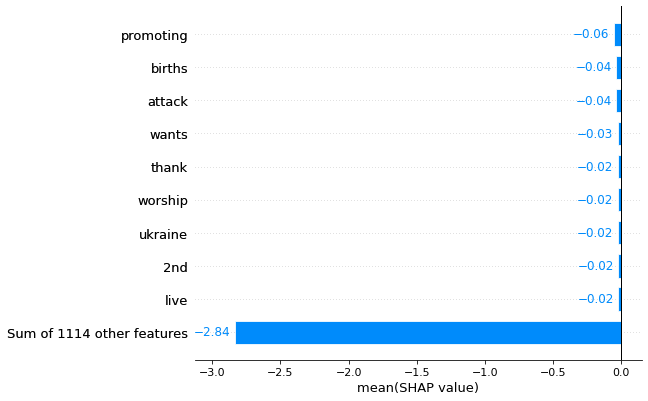

In [ ]:
shap.plots.bar(shap_values[:,:,"LABEL_0"].mean(0))

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


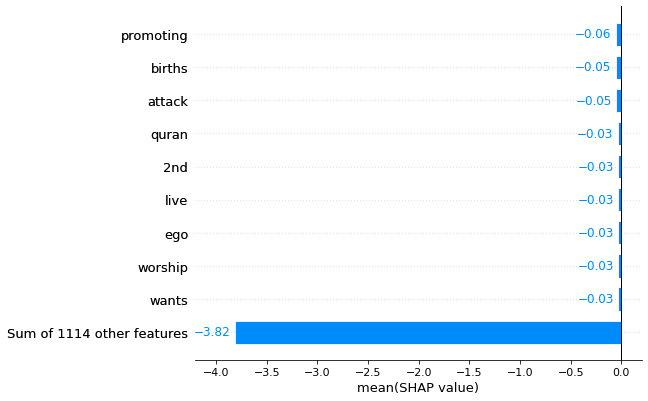

In [ ]:
shap.plots.bar(shap_values[:,:,"LABEL_1"].mean(0))

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


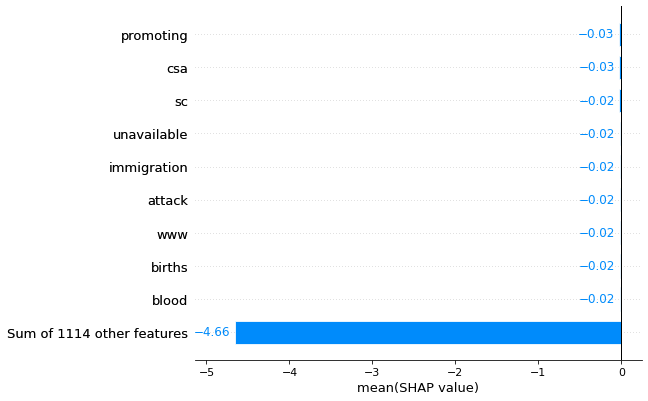

In [ ]:
shap.plots.bar(shap_values[:,:,"LABEL_2"].mean(0))

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


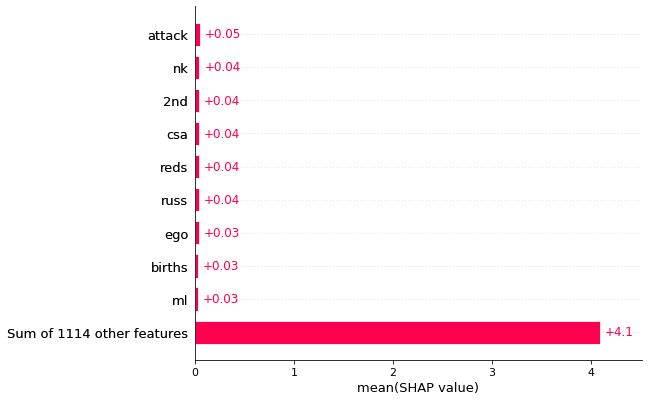

In [ ]:
shap.plots.bar(shap_values[:,:,"LABEL_3"].mean(0))

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


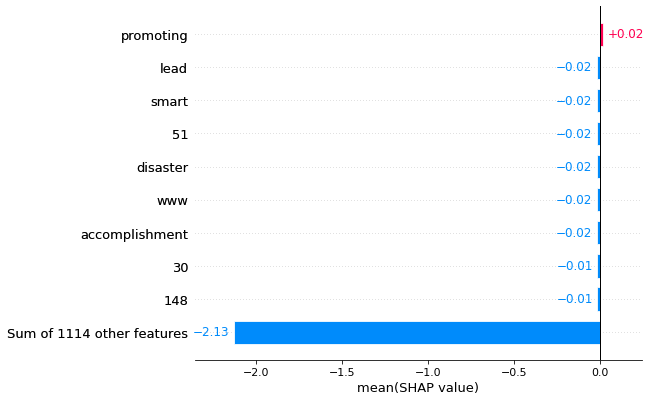

In [ ]:
shap.plots.bar(shap_values[:,:,"LABEL_4"].mean(0))

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


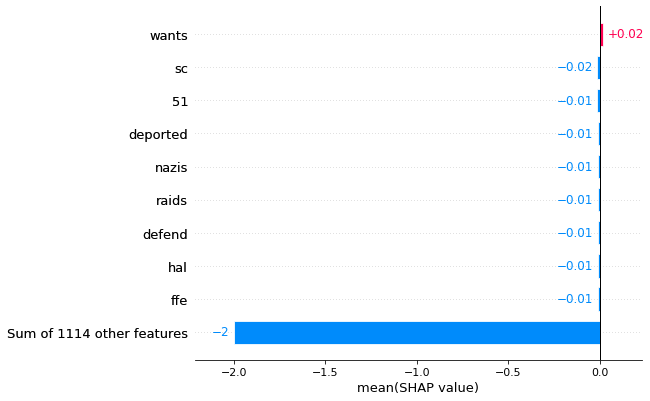

In [ ]:
shap.plots.bar(shap_values[:,:,"LABEL_5"].mean(0))

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


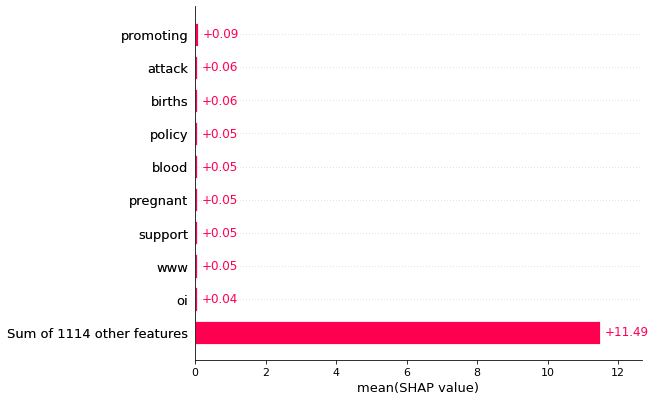

In [ ]:
shap.plots.bar(shap_values[:,:,"LABEL_6"].mean(0))

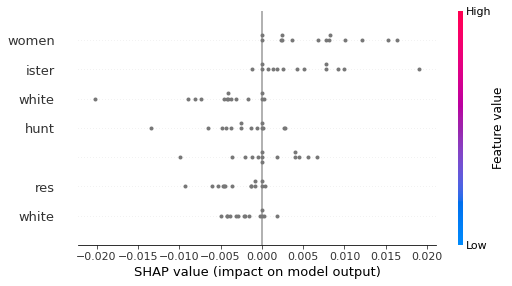

In [ ]:
# summary plot
shap_copy = shap_values[0]
shap.summary_plot(shap_copy, dataframe)

In [ ]:
# dependency plot
shap.dependence_plot('rank(0)', shap_values, dataframe, interaction_index="irony")

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


TypeError: ignored

### SHAP WITH LOGITS

In [ ]:
logit_explainer = shap.Explainer(shap.models.TransformersPipeline(pred, rescale_to_logits=True))

logit_shap_values = logit_explainer(data['text'][:3])
shap.plots.text(logit_shap_values)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
You seem to be using the pipelines sequentially on GPU. In order to maximize efficie

  0%|          | 0/182 [00:00<?, ?it/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
You seem to be using the pipelines sequentially on GPU. In order to maximize efficie

  0%|          | 0/248 [00:00<?, ?it/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
You seem to be using the pipelines sequentially on GPU. In order to maximize efficie

  0%|          | 0/248 [00:00<?, ?it/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
You seem to be using the pipelines sequentially on GPU. In order to maximize efficie

In [ ]:
shap.plots.text(logit_shap_values)

In [ ]:
shap.plots.bar(shap_values[:,:,"LABEL_0"].mean(0))

In [ ]:
shap.plots.bar(shap_values[:,:,"LABEL_1"].mean(0))

In [ ]:
shap.plots.bar(shap_values[:,:,"LABEL_2"].mean(0))

In [ ]:
shap.plots.bar(shap_values[:,:,"LABEL_3"].mean(0))

In [ ]:
shap.plots.bar(shap_values[:,:,"LABEL_4"].mean(0))

In [ ]:
shap.plots.bar(shap_values[:,:,"LABEL_5"].mean(0))

In [ ]:
shap.plots.bar(shap_values[:,:,"LABEL_6"].mean(0))